In [1]:
import pandas as pd
import numpy as np
import bluebelt as blue

In [2]:
nrows = 100
ncols = 6

np.random.seed(27)
series = pd.Series(np.random.weibull(7,nrows) * 100, index=pd.date_range(start='1-1-2020', periods=nrows), name='process A')
frame = pd.DataFrame(np.random.normal(loc=100, scale=20, size=ncols*nrows).reshape(nrows, ncols), index=pd.date_range(start='1-1-2020', periods=nrows), columns=[f'process {col}' for col in range(1, ncols+1)])

In [3]:
series2 = pd.Series(np.random.normal(loc=100, scale=20, size=nrows), index=pd.date_range(start='1-1-2020', periods=nrows), name='process A')

In [4]:
# ValueError
series.blue.forecast.mape()

ValueError: Please provide forecast data or actuals data. One pandas Series is not enough to calculate forecast accuracy.

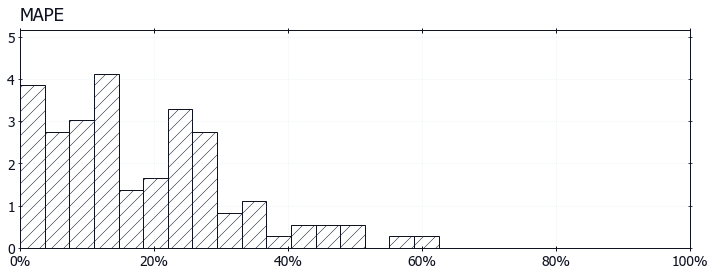

In [6]:
series.blue.forecast.mape(actuals=series2).plot(figsize=(12,4))

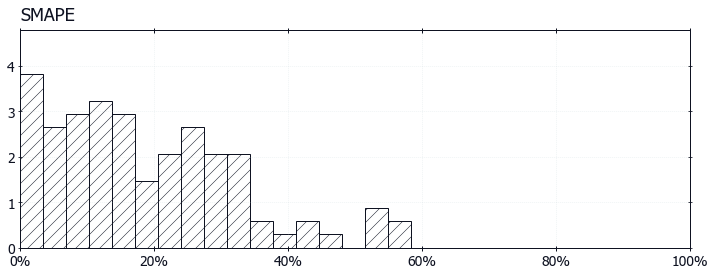

In [7]:
series.blue.forecast.smape(actuals=series2).plot(figsize=(12,4))

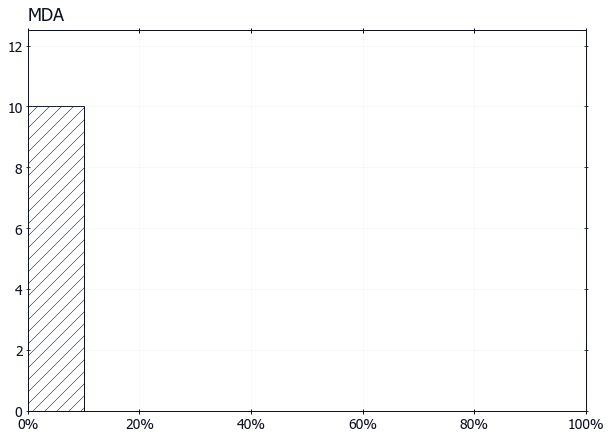

In [8]:
series.blue.forecast.mda(forecast=series2).plot()

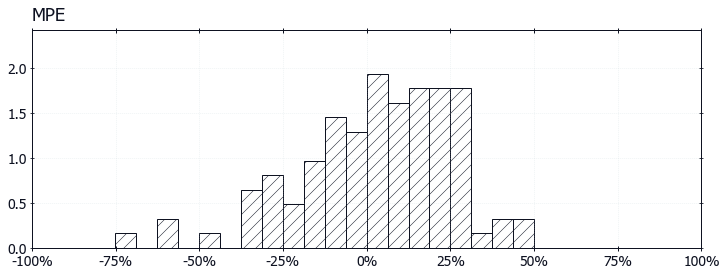

In [9]:
series.blue.forecast.mpe(actuals=series2).plot(figsize=(12,4))

In [10]:
# break the series
breaks = series.shape[0] // 5
loc = list(np.arange(0+breaks, series.shape[0], breaks))
series.iloc[loc] = np.nan

# break the frame
breaks = frame.shape[0] // 5
loc = list(np.arange(0+breaks, frame.shape[0], breaks))
for x in range(frame.shape[1]):
    frame.iloc[loc,x] = np.nan

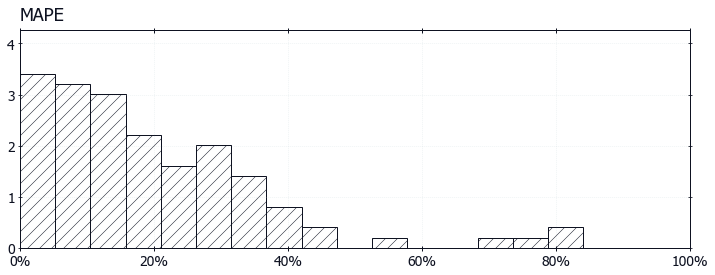

In [11]:
series.blue.forecast.mape(forecast=series2).plot(figsize=(12,4))

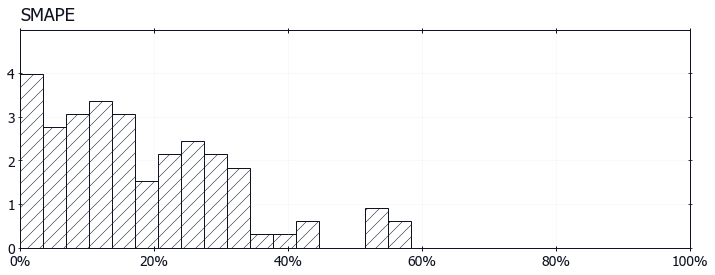

In [12]:
series.blue.forecast.smape(forecast=series2).plot(figsize=(12,4))

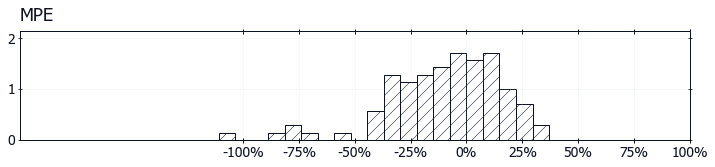

In [13]:
series.blue.forecast.mpe(forecast=series2).plot(xlim=(-2,1), figsize=(12,2))